### 필요한 패키지들을 불러온다.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno

### 데이터를 불러온다.

In [6]:
df = pd.read_csv("C:/python/fintech_credit/cs-training.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


### 결측치가 존재하는 변수를 시각화.

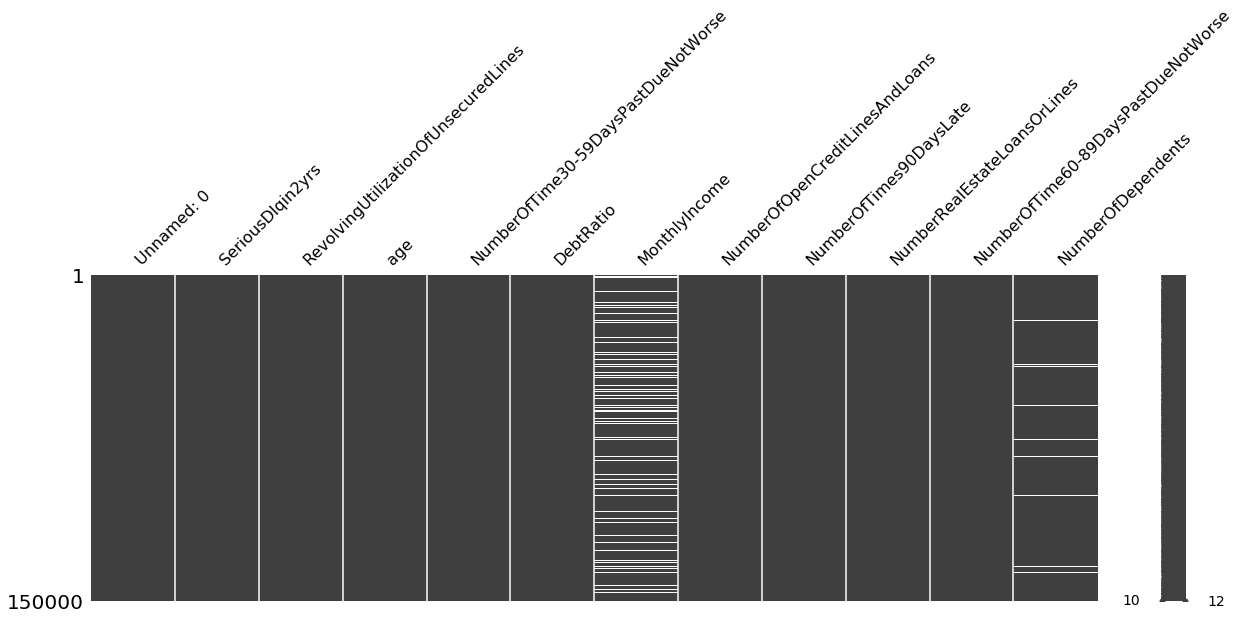

In [7]:
mno.matrix(df, figsize = (20, 6)) 

#### 1.데이터내 연체경험이 있는 사람 수 시각화

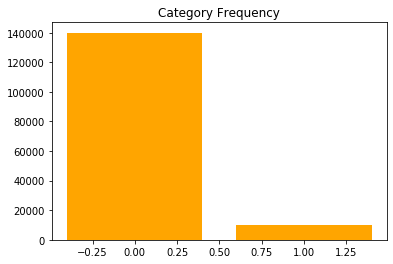

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [16]:
labels=['0','1']
table = df.SeriousDlqin2yrs.value_counts()
plt.bar(table.index,table.values,color = 'orange')
plt.title('Category Frequency')
plt.show()
table

#### 2.RevolvingUtilizationOfUnsecuredLines 그룹화

In [17]:
mask = df['SeriousDlqin2yrs'].notnull()#notnull()는 관측치가 결측이면 False, 결측이 아니면 True를 반환

In [18]:
bins1 = [0, 0.25, 0.50, 0.75, 1.0, 1.25, 10, df['RevolvingUtilizationOfUnsecuredLines'].max()] #신용도로 그룹화
labels1 = ['0-0.25', '0.25-0.50', '0.50-0.75', '0.75-1.0', '1.0-1.25','1.25-10','10+']

df['ru_grouped'] = pd.cut(df['RevolvingUtilizationOfUnsecuredLines'],bins1, right=0, labels=labels1)
gb1 = df[mask].groupby('ru_grouped')['SeriousDlqin2yrs']
pd.concat([gb1.count(), gb1.mean()], axis=1) #빈도, 평균

,SeriousDlqin2yrs,SeriousDlqin2yrs
ru_grouped,,
0-0.25,87657,0.021367
0.25-0.50,21055,0.052909
0.50-0.75,13764,0.101279
0.75-1.0,24186,0.182089
1.0-1.25,2412,0.384743
1.25-10,685,0.432117
10+,240,0.070833


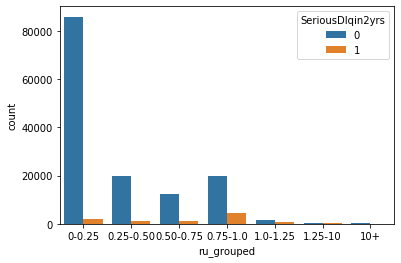

In [19]:
sns.countplot(data=df, x='ru_grouped', hue='SeriousDlqin2yrs')

#### 3.age 그룹화

In [20]:
bins = [0, 30, 40, 50, 60, 70, 110] #0대~10대 합체_나이별로 그룹화
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_grouped'] = pd.cut(df['age'], bins, right=0, labels=labels)
gb = df[mask].groupby('age_grouped')['SeriousDlqin2yrs']
pd.concat([gb.count(), gb.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
age_grouped,,
0-29,8821,0.117334
30-39,23183,0.100720
40-49,34377,0.083719
50-59,35301,0.064531
60-69,28905,0.036326
70+,19413,0.023180


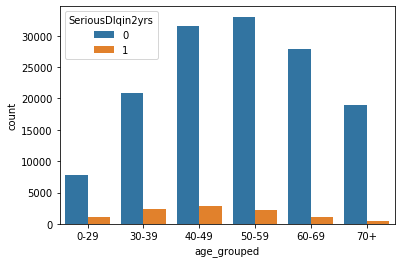

In [21]:
sns.countplot(data=df, x='age_grouped', hue='SeriousDlqin2yrs')

#### 4.DeptRatio그룹화

In [25]:
bins2 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100,
       df['DebtRatio'].max()] #월별 부채지급
labels2 = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9'
           , '0.9-1.0', '1.0-2.0', '2.0-5.0','5.0-10.0','10.0-20.0','20.0-50.0','50.0-100.0','100+']
df['dr_grouped'] = pd.cut(df['DebtRatio'], bins2, right=0,labels=labels2)
gb2 = df[mask].groupby('dr_grouped')['SeriousDlqin2yrs']
pd.concat([gb2.count(), gb2.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
dr_grouped,,
0-0.1,24520,0.059299
0.1-0.2,17767,0.063601
0.2-0.3,20273,0.053766
0.3-0.4,18008,0.059251
0.4-0.5,13134,0.069590
0.5-0.6,8393,0.088407
0.6-0.7,5426,0.095651
0.7-0.8,3398,0.110065
0.8-0.9,2199,0.111869


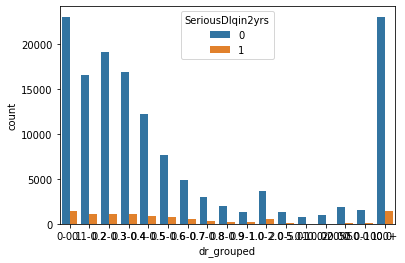

In [27]:
sns.countplot(data=df, x='dr_grouped', hue='SeriousDlqin2yrs')

### 5.NumberofDependents그룹화

In [29]:
bins3 = [0,1,2,df['NumberOfDependents'].max()] #월별 부채지급
labels3 = ['0-1', '1-2', '2+']
df['nd_grouped'] = pd.cut(df['NumberOfDependents'], bins3, right=0,labels=labels3)
gb3 = df[mask].groupby('nd_grouped')['SeriousDlqin2yrs']
pd.concat([gb3.count(), gb3.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
nd_grouped,,
0-1,86902,0.058629
1-2,26316,0.073529
2+,32857,0.085735


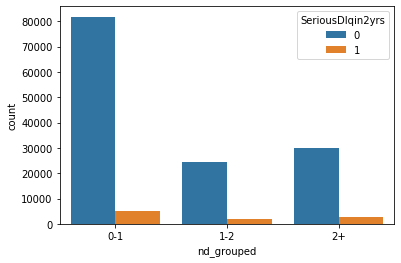

In [31]:
sns.countplot(data=df, x='nd_grouped', hue='SeriousDlqin2yrs')

#### 6.NumberOfOpenCreditLinesAndLoans 그룹화 

In [32]:
bins4 = [0, 10, 20, 30, 40, 50, 60] 
labels4 = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+'] # label이 bins보다 1개 적어야함 
df['NumberOfOpenCreditLinesAndLoans_cut'] = pd.cut(df['NumberOfOpenCreditLinesAndLoans'], bins4, right=0, labels=labels4)
gb4 = df[mask].groupby('NumberOfOpenCreditLinesAndLoans_cut')['SeriousDlqin2yrs']
pd.concat([gb4.count(), gb4.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
NumberOfOpenCreditLinesAndLoans_cut,,
0-9,97366,0.068741
10-19,47485,0.062272
20-29,4707,0.072233
30-39,370,0.072973
40-49,55,0.127273
50+,17,0.117647


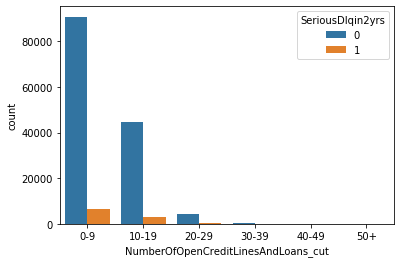

In [33]:
sns.countplot(data=df, x='NumberOfOpenCreditLinesAndLoans_cut', hue='SeriousDlqin2yrs')

#### 7.NumberOfTimes90DaysLate 그룹화

In [35]:
bins5 = [0, 10, 20, 30, 40, 50, df['NumberOfTimes90DaysLate'].max()]
labels5 = ['0-10', '10-20', '20-30', '30-40', '40-50','50+']
df['NT9_grouped'] = pd.cut(df['NumberOfTimes90DaysLate'], bins5, right=0, labels=labels5)
gb5 = df[mask].groupby('NT9_grouped')['SeriousDlqin2yrs']
pd.concat([gb5.count(), gb5.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
NT9_grouped,,
0-10,149707,0.065902
10-20,24,0.541667
20-30,0,NaN
30-40,0,NaN
40-50,0,NaN
50+,5,0.800000


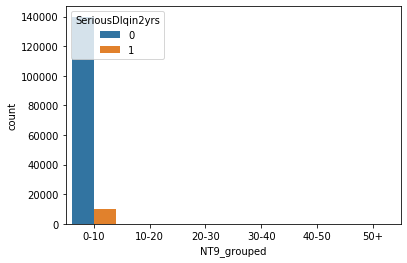

In [37]:
sns.countplot(data=df, x='NT9_grouped', hue='SeriousDlqin2yrs')

#### 8.NumberRealEstateLoansOrLines그룹화

In [38]:
bins6 = [0, 10, 20, 30, 40]
labels6 = ['0-9', '10-19', '20-29', '29+']
df['NE_grouped'] = pd.cut(df['NumberRealEstateLoansOrLines'], bins6, right=0, labels=labels6)
gb6 = df[mask].groupby('NE_grouped')['SeriousDlqin2yrs']
pd.concat([gb6.count(), gb6.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
NE_grouped,,
0-9,149869,0.066725
10-19,119,0.193277
20-29,10,0.300000
29+,1,0.000000


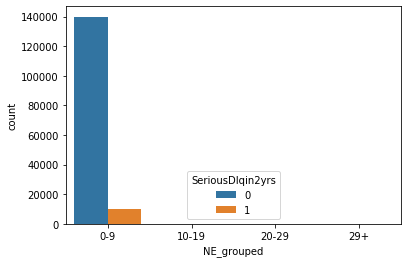

In [39]:
sns.countplot(data=df, x='NE_grouped', hue='SeriousDlqin2yrs')

#### 9.MonthlyIncome그룹화

In [40]:
mask = df['SeriousDlqin2yrs'].notnull()
bins7 = [0, 1, 2, 10, 100, 1000, 10000, 100000,df['MonthlyIncome'].max()] #0대~10대 합체_나이별로 그룹화
labels7 = ['0-1', '1-2', '2-10', '10-100', '100-1000', '1000-10000', '10000-100000','100000+']
df['MonthlyIncome_grouped'] = pd.cut(df['MonthlyIncome'], bins7, right=0, labels=labels7)
gb7 = df[mask].groupby('MonthlyIncome_grouped')['SeriousDlqin2yrs']
pd.concat([gb7.count(), gb7.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
MonthlyIncome_grouped,,
0-1,1634,0.040392
1-2,605,0.028099
2-10,12,0.083333
10-100,26,0.000000
100-1000,2151,0.062762
1000-10000,96056,0.075810
10000-100000,19708,0.043282
100000+,76,0.039474


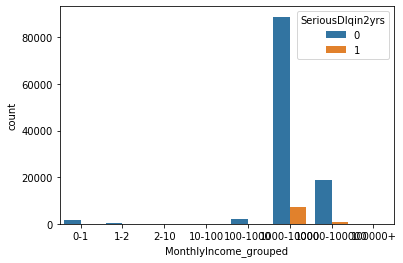

In [41]:
sns.countplot(data=df, x='MonthlyIncome_grouped', hue='SeriousDlqin2yrs')

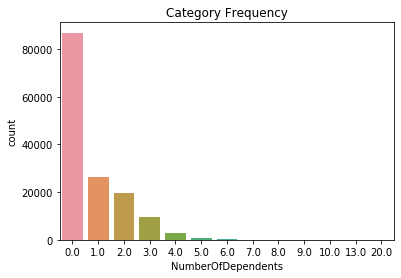

In [42]:
sns.countplot(df.NumberOfDependents).set_title('Category Frequency')
plt.show()

## 각 변수간 상관관계를 알아본다.
##### Unnamed: 0은 고려하지 않음.

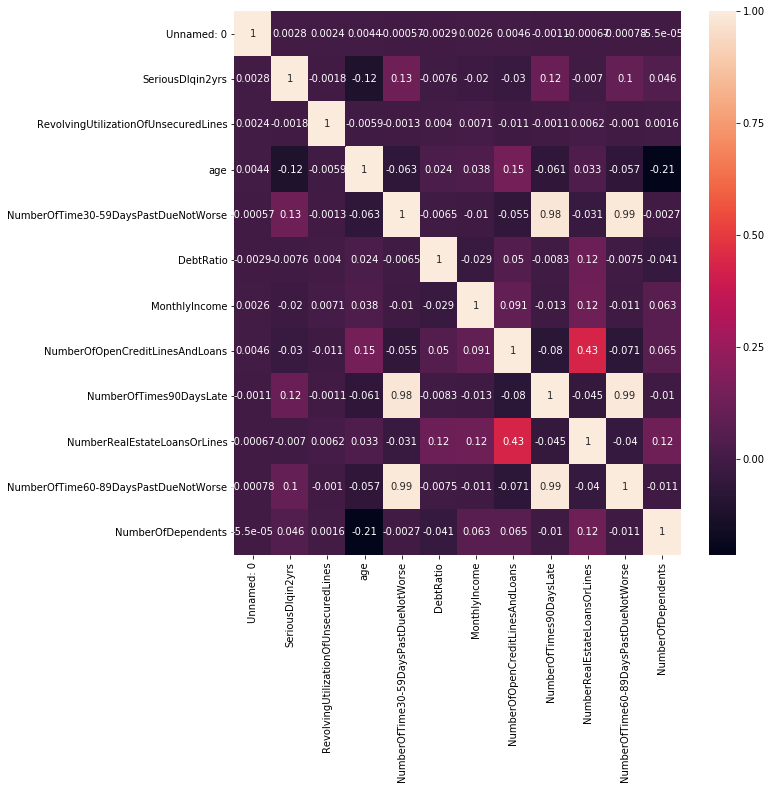

In [43]:
cor=df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,ax=ax)

In [ ]:
sns.pairplot(df)

C:\Anaconda_\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda_\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


## 변수간 Scatter plot, 변수의 Histogram

C:\Anaconda_\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda_\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda_\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda_\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


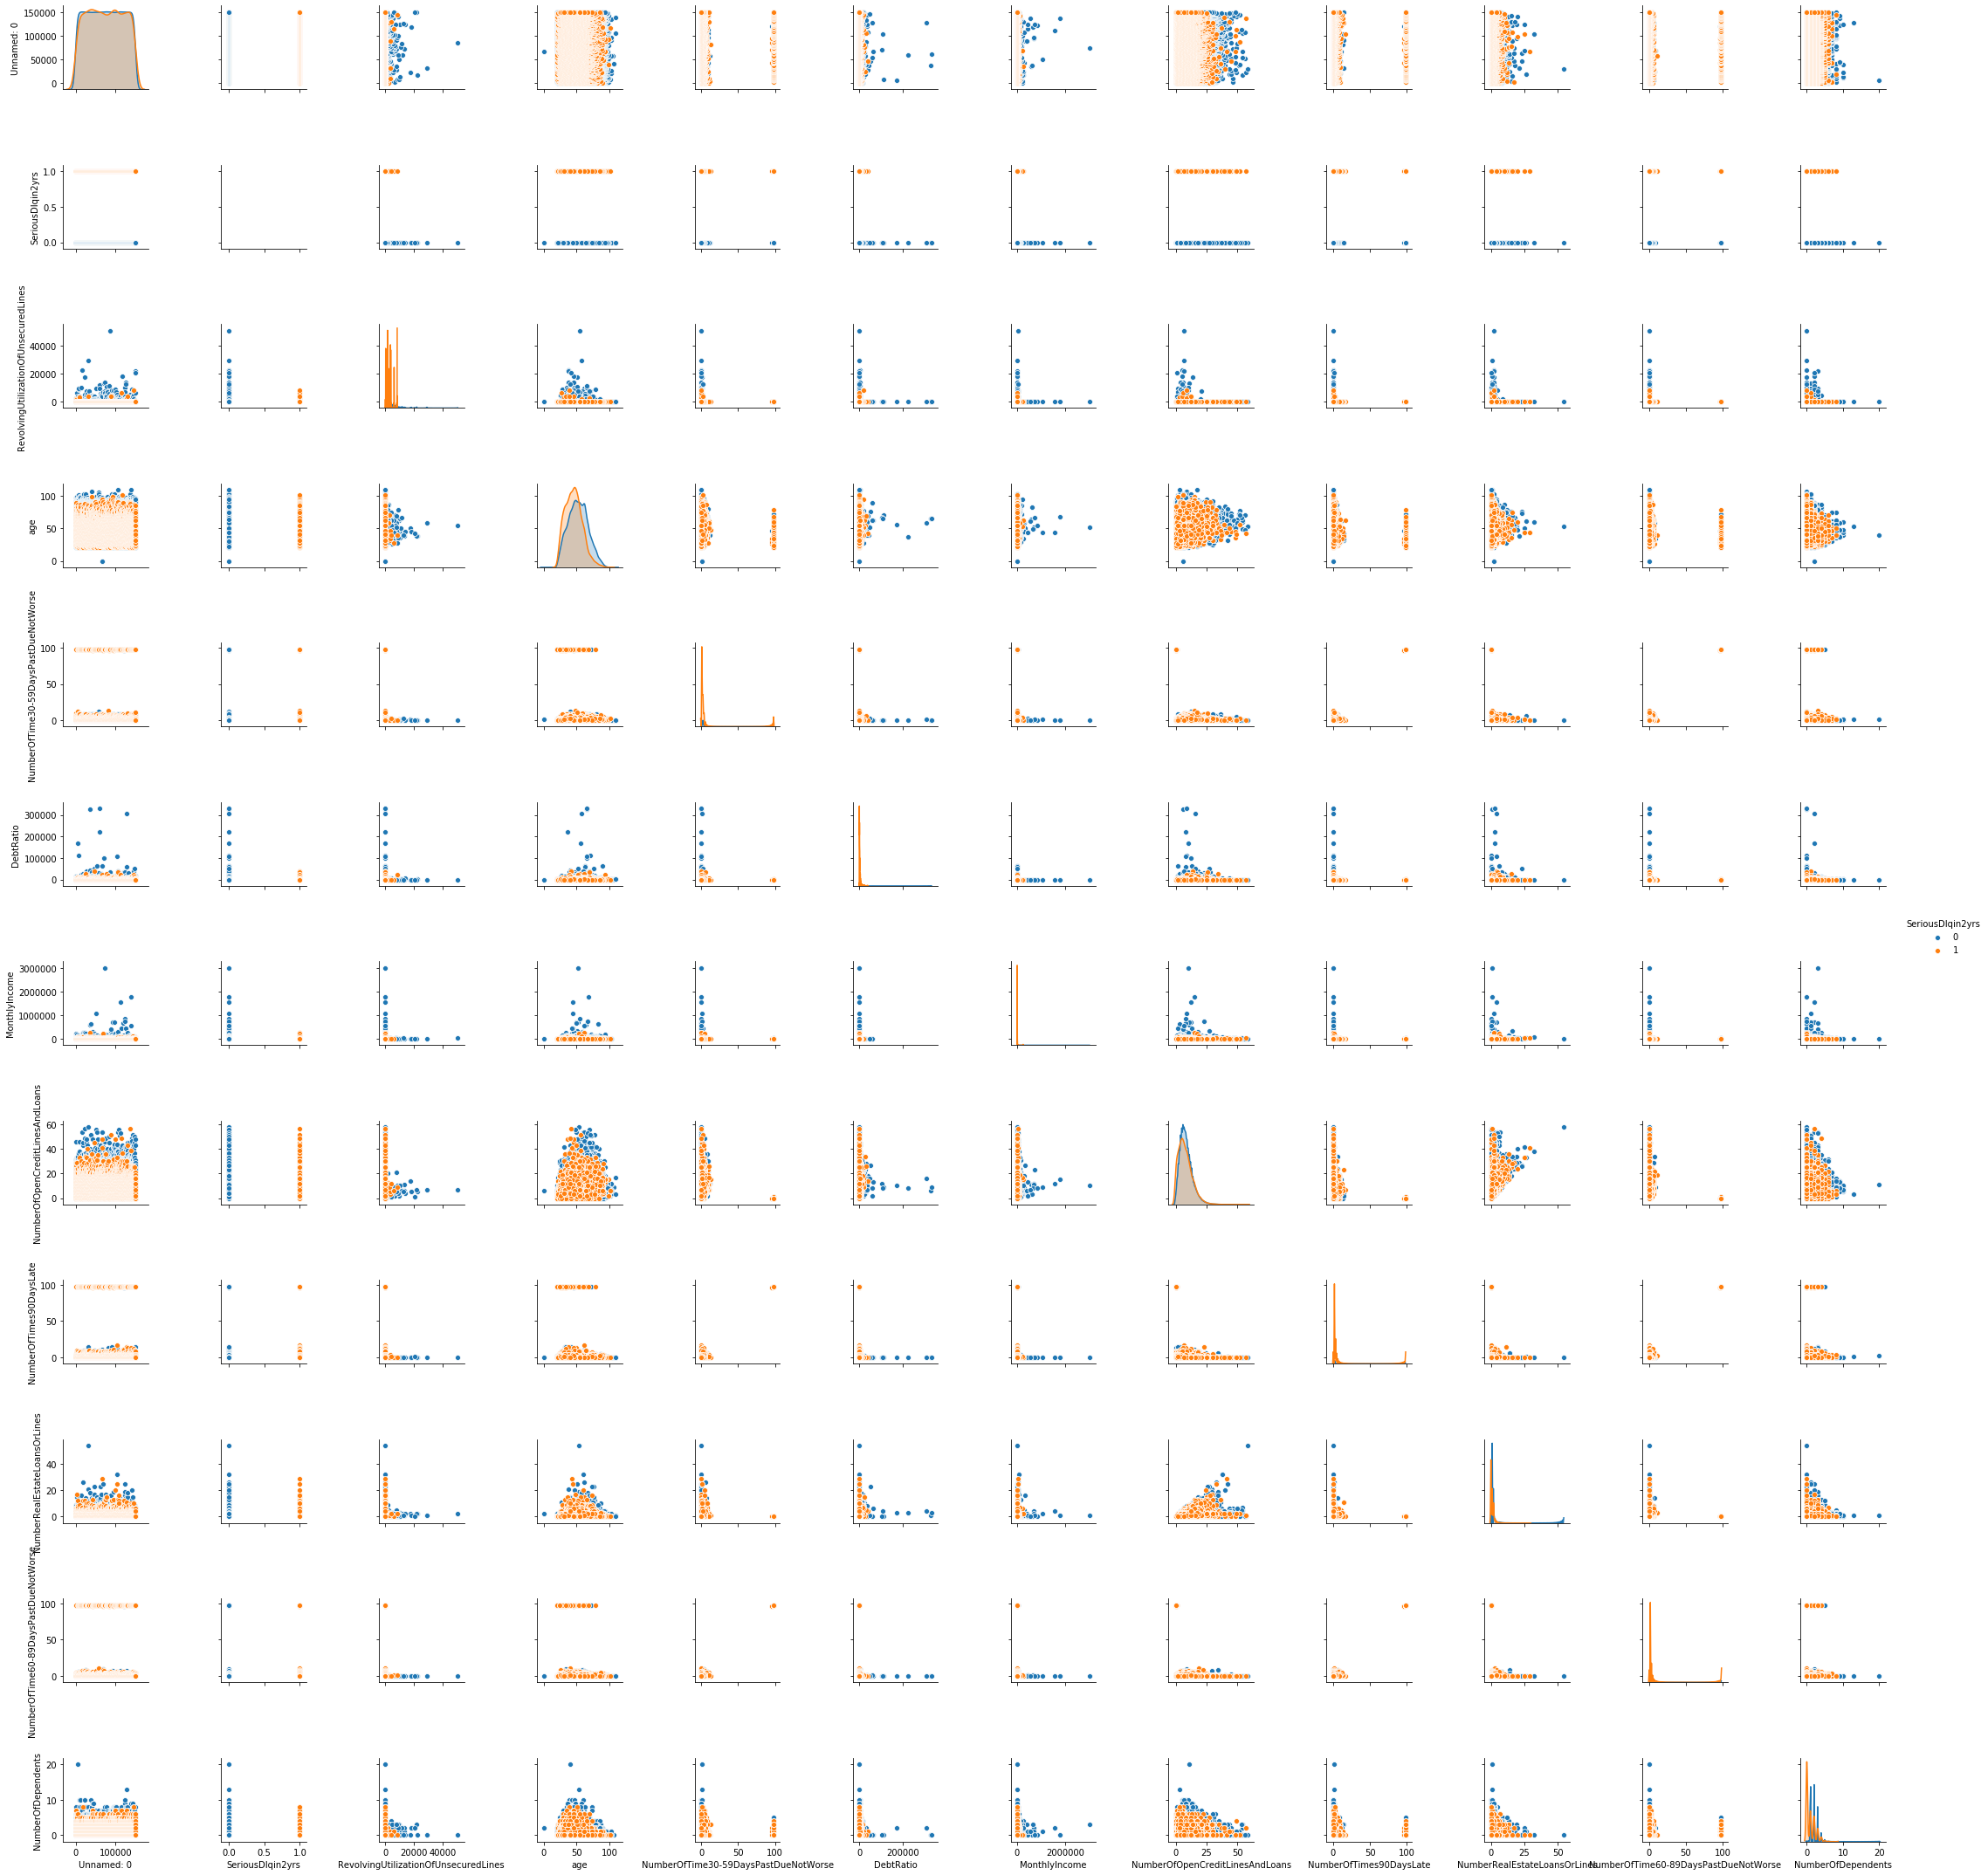

In [46]:
sns.pairplot(data=df, hue="SeriousDlqin2yrs")